In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [2]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import TCI_Lsite_accumulative_v1 as TCI

importlib.reload(ED)
importlib.reload(TCI)


<module 'TCI_Lsite_accumulative_v1' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1.py'>

In [3]:
# define Hamiltonian terms
L = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
D = L


### Model 0

In [9]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
iterlist = [1,2,3,4,5,6,7,8,9,10]
err2list = [[] for i in iterlist]
errmaxlist = [[] for i in iterlist]
evallist = [[] for i in iterlist]

H = ED.gen_Ham(L = L, model = 0)
for n in nlist:
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    for idx, i in enumerate(iterlist):  
        func = TCI.function(f_t)
        _, _, evals, err_2, err_max, _ = TCI.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                        func_vals,    
                                        D,
                                        L=n,          # number of MPS tensors
                                        iters=i)
        
        err2list[idx].append(err_2)
        errmaxlist[idx].append(err_max)     
        evallist[idx].append(evals)   

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  3.506908645940926e-15
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.23062285558574414
err_2:  0.2397128352584316
evals:  48

repeated evaluations:  100
unique evaluations 48
unique + repeated:  148
total evaluations:  148

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.01628334985407953
err_2:  0.017467425608112732
evals:  84

repeated evaluations:  376
unique evaluations 84
unique + repeated:  460
total evaluations:  460

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.002358433146865054
err_2:  0.0021713204545567156
evals:  128

repeated evaluations:  848
unique evaluations 128
unique + repeated:  976
total evaluations:  976

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0004441027677317193
err_2:  0.00023729192574305452
evals:  160

repeated evaluations:  1528
unique evaluations 160
unique + repeated:  1688
total evaluations:  1688

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  6.586129185867454e-05
err_2:  5.075006836908617e-05
eval

### Error(#evals) for fixed n

In [31]:
print(iterlist)
print()
print(err2list)
print()
print(evallist)

evallist_transpose = [list(col) for col in zip(*evallist)]
err2list_transpose = [list(col) for col in zip(*err2list)]
print()
print(evallist_transpose)
print(err2list_transpose)

#could have also used list(zip(*evallist)) but then each sublist is not a list but just a tuple


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[[0.2397128352584316, 0.6353900427746311, 0.7139433962767807, 0.8136799705211966, 0.8652386488100007], [0.017467425608112732, 0.17804232013909327, 0.6038523267575487, 0.697008504322861, 0.7753304848806787], [0.0021713204545567156, 0.038788826969336436, 0.4225667494678318, 0.515023432368344, 0.6134679384193813], [0.00023729192574305452, 0.0020951504595367126, 0.0853773239320504, 0.28315331848453335, 0.340289043905946], [5.075006836908617e-05, 0.00043398466367332793, 0.0006422197345250233, 0.0007516265897003127, 0.0007639415081410096], [2.8047269126239467e-06, 0.0003153644591409882, 0.0004513688208734564, 0.0005785479943230342, 0.000660550828453273], [2.7094184210798895e-07, 4.834962971071135e-05, 0.00023431443912330709, 0.0004601141832508267, 0.000582105437329295], [2.964090370029228e-08, 3.479352386470771e-06, 0.00013191932958175895, 0.00032725870549182075, 0.0004904806209614148], [1.205817101447524e-09, 7.981208994312369e-07, 5.783192042137191e-05, 0.0

In [33]:
col_trimmed = evallist_transpose[0][:-3]
evallist_transpose_trimmed = [col_trimmed] + [col for col in evallist_transpose[1:]]
print(evallist_transpose_trimmed)

[[48, 84, 128, 160, 192, 224, 256], [56, 102, 160, 210, 264, 322, 384, 414, 440, 462], [64, 120, 192, 260, 336, 420, 512, 576, 640, 704], [72, 138, 224, 310, 408, 518, 640, 738, 840, 946], [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]]


In [34]:
print(err2list_transpose)
col_trimmed_err = err2list_transpose[0][:(len(col_trimmed)-1)]
col_trimmed_err.append(err2list_transpose[0][-1])
err2list_transpose_trimmed = [col_trimmed_err] + [col for col in err2list_transpose[1:]]
print(err2list_transpose_trimmed)

[[0.2397128352584316, 0.017467425608112732, 0.0021713204545567156, 0.00023729192574305452, 5.075006836908617e-05, 2.8047269126239467e-06, 2.7094184210798895e-07, 2.964090370029228e-08, 1.205817101447524e-09, 2.548671376463525e-11], [0.6353900427746311, 0.17804232013909327, 0.038788826969336436, 0.0020951504595367126, 0.00043398466367332793, 0.0003153644591409882, 4.834962971071135e-05, 3.479352386470771e-06, 7.981208994312369e-07, 2.036087555647114e-08], [0.7139433962767807, 0.6038523267575487, 0.4225667494678318, 0.0853773239320504, 0.0006422197345250233, 0.0004513688208734564, 0.00023431443912330709, 0.00013191932958175895, 5.783192042137191e-05, 2.0550377013617474e-05], [0.8136799705211966, 0.697008504322861, 0.515023432368344, 0.28315331848453335, 0.0007516265897003127, 0.0005785479943230342, 0.0004601141832508267, 0.00032725870549182075, 0.00019650991709195052, 0.00010133212783111506], [0.8652386488100007, 0.7753304848806787, 0.6134679384193813, 0.340289043905946, 0.00076394150814

0
1
2
3
4


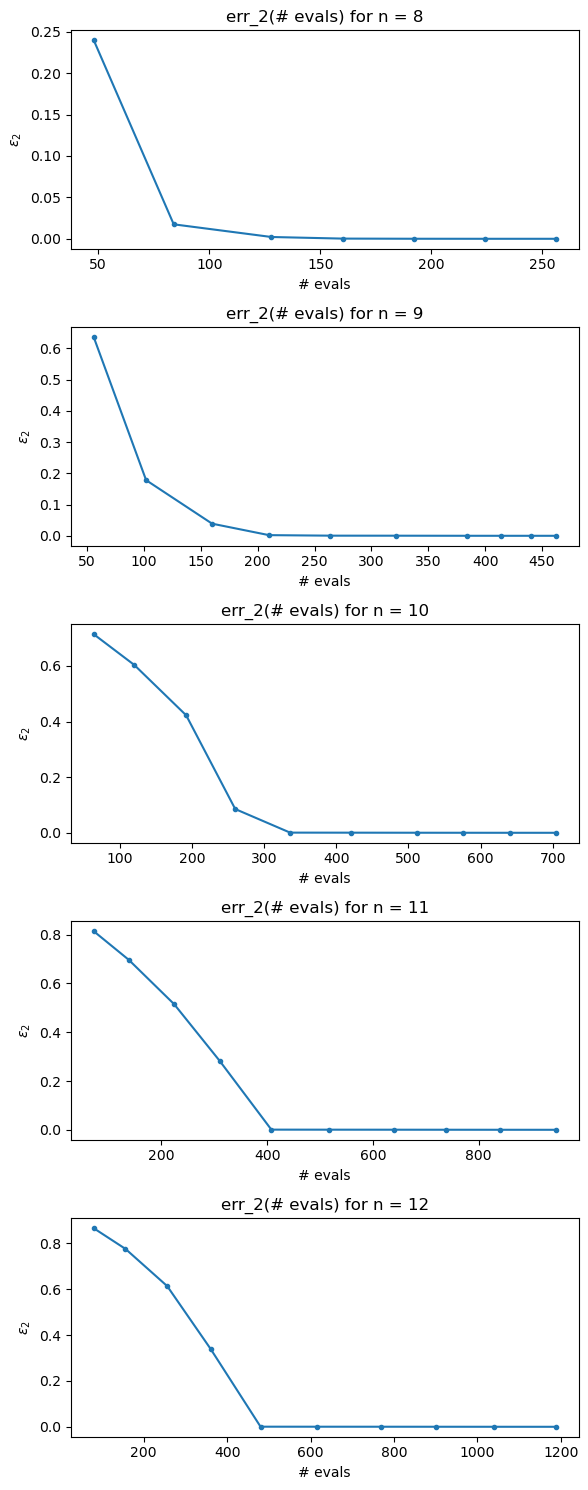

In [47]:
fig, ax = plt.subplots(len(nlist), 1, figsize = (6, 3*len(nlist)))

for idx, i in enumerate(nlist):
    print(idx)
    ax[idx].plot(evallist_transpose_trimmed[idx], err2list_transpose_trimmed[idx], '.-')
    ax[idx].set(xlabel = '# evals', ylabel = r'$\epsilon_2$')
    ax[idx].set_title(f'err_2(# evals) for n = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()

### Error vs N at fixed number of evaluations (fixed iterations)

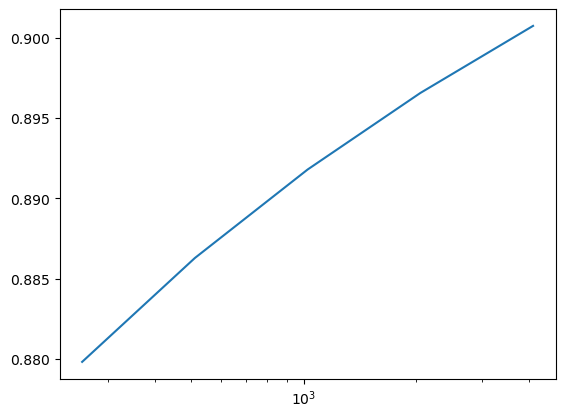

In [49]:
def exp_func(N, A, B, D):
    return A*np.exp(-1/np.sqrt(D*np.log(N))) - B


plt.plot(Nlist, [exp_func(N, 1, 0, D) for N in Nlist])
plt.xscale('log')

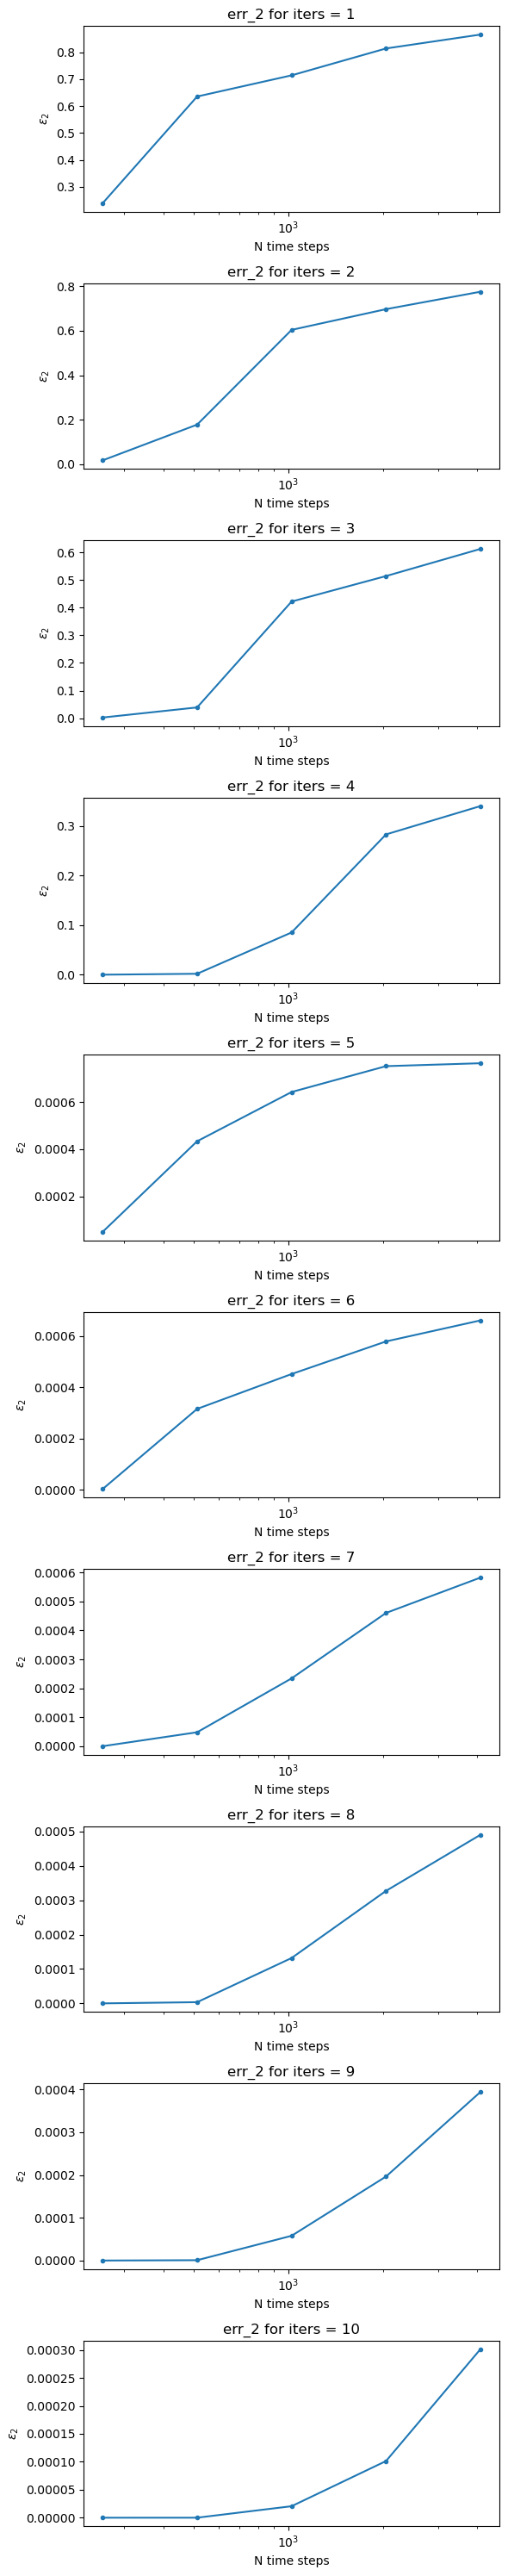

In [45]:
fig, ax = plt.subplots(len(iterlist), 1, figsize = (6, 3*len(iterlist)))

for idx, i in enumerate(iterlist):
    ax[idx].plot(Nlist, err2list[idx], '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = r'$\epsilon_2$')
    ax[idx].set(xscale = 'log')
    ax[idx].set_title(f'err_2 for iters = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()

### # of evals(N) at fixed error! (run until err < err_threshold)

In [38]:
import TCI_Lsite_accumulative_v1_err_threshold as TCI_err

importlib.reload(TCI_err)


<module 'TCI_Lsite_accumulative_v1_err_threshold' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1_err_threshold.py'>

In [39]:
errlist = [10**(-i) for i in range(1,10,1)]
print(errlist)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


### Check how well algorithm works: 
i.e. how close the convergence error of the algorithm is w.r.t. threshold

In [40]:
n = 11
N = 2**n
H = ED.gen_Ham(L = L, model = 0)
Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
func_vals = Cs.T #Cs is in the form (X,T)
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
for err in errlist:
    print("err ", err)
    func = TCI_err.function(f_t)
    evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                            func_vals,    
                            D,
                            L=n,          # number of MPS tensors
                            threshold = err) 
    print()

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  9.573162956119857e-17
err  0.1
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.0001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.00010062851489873927
err_2:  4.2754600809619453e-05
unique evaluations 1056

err  1e-05
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  8.57993418765467e-06
err_2:  4.190775837469242e-06
unique evaluations 1288

err  1e-06
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  7.244543410415088e-07
err_2:  2.654983763457423e-07
unique evaluations 1536

err  1e-07
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  2.745913693112128e-07
err_2:  8.330687596481178e-08
unique evaluations 1598

err

In [41]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
errlist = [10**(-i) for i in range(2,8,1)]
evalslist = [[] for i in errlist]


H = ED.gen_Ham(L = L, model = 0)
for n in nlist:
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    for idx, err in enumerate(errlist):
        print("err ", err)
        func = TCI_err.function(f_t)
        evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                func_vals,    
                                D,
                                L=n,          # number of MPS tensors
                                threshold = err) 
        evalslist[idx].append(evals)
        


Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  2.6046150151701678e-15
err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0023584331468512066
err_2:  0.0021713204545518194
unique evaluations 128
err  0.001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0004441027677397985
err_2:  0.0002372919257492807
unique evaluations 160
err  0.0001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  6.58612918572091e-05
err_2:  5.075006836528782e-05
unique evaluations 192
err  1e-05
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  3.2486659939474137e-06
err_2:  2.804726910248442e-06
unique evaluations 224
err  1e-06
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  4.89130703795063e-07
err_2:  2.709418403420484e-07
unique evaluations 256
err  1e-07
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  5.599817658498504e-08
err_2:  2.9640903246103827e-08
unique evaluations 256
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -1.7234088908740592e-15
err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0029126

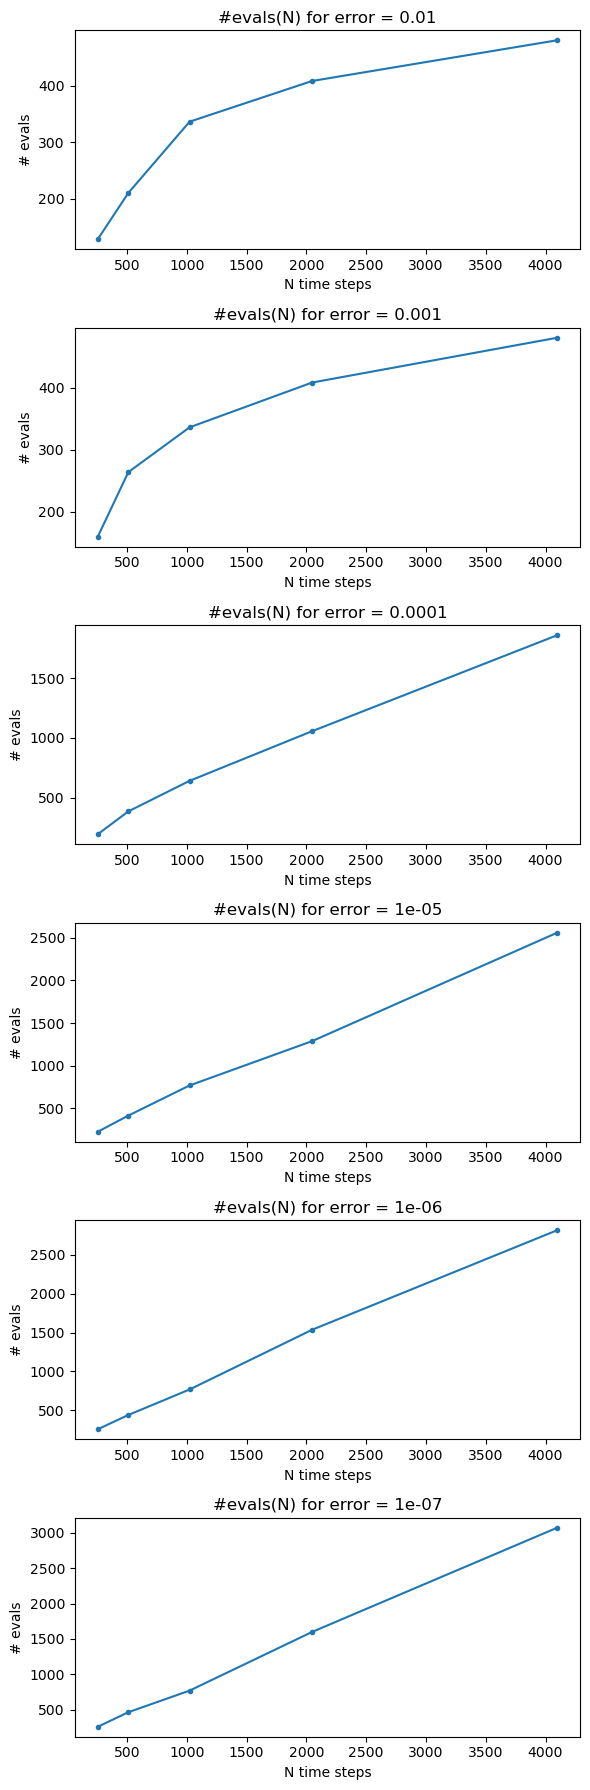

In [51]:
fig, ax = plt.subplots(len(errlist), 1, figsize = (6, 3*len(errlist)))

for idx, i in enumerate(errlist):
    ax[idx].plot(Nlist, evalslist[idx], '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = '# evals')
    ax[idx].set_title(f'#evals(N) for error = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()

### error(#evals) 

In [ ]:
err2list = []
evallist = []
iterlist = [i for i in range(1,10)]

for i in iterlist:
    _, _, evals, err_2, err_max, func_interp = TCI.accumulative_tensor_cross_interpolation(func_acc,         # function to be interpolated
                                   func_vals,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   iters=i)       # number of back-and-forth sweeps
    err2list.append(err_2)
    evallist.append(evals)


plt.plot(evallist, err2list)
plt.legend()
plt.show()

## WEIGHTED TCI!

In [33]:
import TCI_Lsite_accumulative_v1_weighted as TCI_weight

importlib.reload(TCI_weight)


<module 'TCI_Lsite_accumulative_v1_weighted' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1_weighted.py'>

In [32]:
n = 11
H = ED.gen_Ham(L = L, model = 0)
Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
func_vals = Cs.T #Cs is in the form (X,T)
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  2.6362249345722554e-16


In [38]:
func = TCI_weight.function(f_t)
As, J, evals, err_2list, runtime = TCI_weight.accumulative_tensor_cross_interpolation(func,
                                                                                      func_vals, D, L, d=2, 
                                                                                      iters=15,
                                                                                      euclidean = True,
                                                                                      weight = True,
                                                                                      model = 0)

err_max:  2.0212833432965626e-06
err_2:  9.722787001487602e-07

repeated evaluations:  51372
unique evaluations 1536
unique + repeated:  52908
total evaluations:  52908



In [37]:
func_2 = TCI_weight.function(f_t)
As, J, evals, err_2list_noweight, runtime_noweight = TCI_weight.accumulative_tensor_cross_interpolation(func_2,
                                                                                      func_vals, D, L, d=2, 
                                                                                      iters=15,
                                                                                      euclidean = True,
                                                                                      weight = False)

err_max:  7.244543370074824e-07
err_2:  2.6549838065068233e-07

repeated evaluations:  51372
unique evaluations 1536
unique + repeated:  52908
total evaluations:  52908



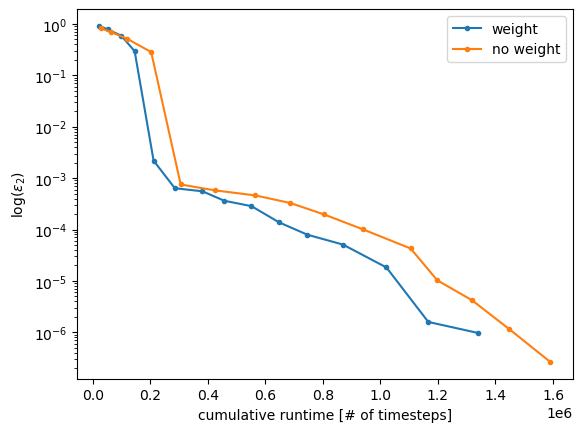

In [40]:
plt.plot(runtime, err_2list, '.-' ,label = 'weight')
plt.plot(runtime_noweight, err_2list_noweight, '.-', label = 'no weight')
plt.xlabel('cumulative runtime [# of timesteps]')
plt.ylabel(r'log($\epsilon_2$)')
plt.yscale('log')
plt.legend()
plt.show()